In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
#ダミー変数化
sex_dum = pd.get_dummies(df['Sex'])
df_dum = pd.concat((df,sex_dum),axis=1)
df_dum = df_dum.drop('Sex',axis=1)
df_dum = df_dum.drop('male',axis=1)
 
emb_dum = pd.get_dummies(df['Embarked'])
df_dum = pd.concat((df_dum,emb_dum),axis=1)
df_dum = df_dum.drop('Embarked',axis=1)
df_dum = df_dum.drop('C',axis=1)

In [5]:
#相関係数の確認
df_dum_dn = df_dum.dropna()
df_dum_dn = df_dum_dn.drop('PassengerId',axis=1)
df_dum_dn = df_dum_dn.drop('Name',axis=1)
df_dum_dn = df_dum_dn.drop('Ticket',axis=1)
df_dum_dn = df_dum_dn.drop('Cabin',axis=1)

df_dum_dn.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,Q,S
Survived,1.000000,-0.037227,-0.244604,0.100339,0.018723,0.134019,0.535727,-0.039232,-0.104544
Pclass,-0.037227,1.000000,-0.307590,-0.100324,0.049894,-0.315069,0.041725,-0.038676,0.241617
Age,-0.244604,-0.307590,1.000000,-0.161625,-0.274813,-0.091542,-0.172307,0.017855,-0.099916
SibSp,0.100339,-0.100324,-0.161625,1.000000,0.258993,0.285492,0.095344,0.169778,0.029704
Parch,0.018723,0.049894,-0.274813,0.258993,1.000000,0.388783,0.081832,-0.065543,0.096096
Fare,0.134019,-0.315069,-0.091542,0.285492,0.388783,1.000000,0.129871,0.015604,-0.240180
female,0.535727,0.041725,-0.172307,0.095344,0.081832,0.129871,1.000000,0.002826,-0.076760
Q,-0.039232,-0.038676,0.017855,0.169778,-0.065543,0.015604,0.002826,1.000000,-0.135548
S,-0.104544,0.241617,-0.099916,0.029704,0.096096,-0.240180,-0.076760,-0.135548,1.000000


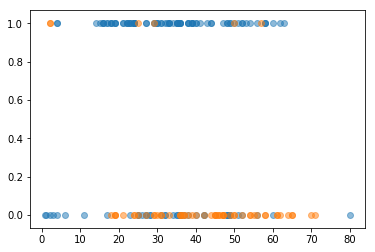

In [6]:
#視覚化　1.0 = 女性　0.0 = 男性　青 = 生存　赤 = 死亡
df_surv = df_dum_dn[df_dum_dn.Survived==1]
df_surv_age = df_surv.iloc[:,2]
df_surv_sex = df_surv.iloc[:,6]
plt.scatter(df_surv_age,df_surv_sex,alpha=0.5)
 
df_surv = df_dum_dn[df_dum_dn.Survived==0]
df_surv_age = df_surv.iloc[:,2]
df_surv_sex = df_surv.iloc[:,6]
plt.scatter(df_surv_age,df_surv_sex,alpha=0.5)

In [7]:
#年齢の補完に敬称を使用
df['Initial']=0
for i in df:
    df['Initial']=df.Name.str.extract('([A-Za-z]+)\.')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  after removing the cwd from sys.path.


In [8]:
pd.crosstab(df.Sex,df.Initial)

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [9]:
#スペルミス、その他敬称について置き換え
df['Initial'].replace(['Capt','Col','Countess','Don','Dr','Jonkheer','Lady','Major','Mlle','Mme','Ms','Rev','Sir'],
                      ['Mr','Other','Other','Mr','Mr','Other','Mrs','Mr','Miss','Other','Miss','Other','Mr'],inplace = True)

In [10]:
df.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.845638
Mr        32.739609
Mrs       36.009174
Other     42.727273
Name: Age, dtype: float64

In [11]:
#年齢値の欠損を各敬称の平均値で補填
df.loc[(df.Age.isnull())&(df.Initial == 'Master'),'Age']=5
df.loc[(df.Age.isnull())&(df.Initial == 'Miss'),'Age']=22
df.loc[(df.Age.isnull())&(df.Initial == 'Mr'),'Age']=33
df.loc[(df.Age.isnull())&(df.Initial == 'Mrs'),'Age']=36
df.loc[(df.Age.isnull())&(df.Initial == 'Other'),'Age']=43

In [12]:
df.Age.isnull().any() 

False

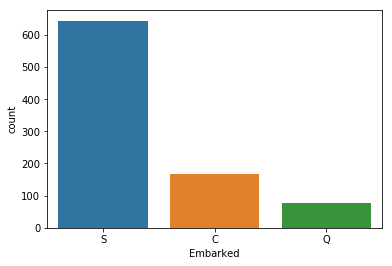

In [13]:
sns.countplot('Embarked',data = df)

In [14]:
#Embarkedの2件の欠損値を'S'に置き換え
df['Embarked'].fillna('S',inplace=True)

In [15]:
#性別、乗船場所、敬称を数値に置き換え
df['Sex'].replace(['male','female'],[0,1],inplace=True)
df['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
df['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

In [16]:
#不要データ削除
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [17]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,0,3,0,22.0,1,0,7.2500,0,0
1,1,1,1,38.0,1,0,71.2833,1,1
2,1,3,1,26.0,0,0,7.9250,0,2
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,0


In [18]:
#モデル作成
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.3,random_state=0,stratify=df['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=df[df.columns[1:]]
Y=df['Survived']

In [20]:
#ランダムフォレスト予測
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
RF_model=RandomForestClassifier(n_estimators=100)
RF_model.fit(X,Y)
pred2=RF_model.predict(test_X)
print('The accuracy of the Random Forests :',metrics.accuracy_score(pred2,test_Y))

The accuracy of the Random Forests : 0.973880597015


In [21]:
#決定木予測
from sklearn.tree import DecisionTreeClassifier
DT_model =DecisionTreeClassifier()
DT_model.fit(X,Y)
pred3 = DT_model.predict(test_X)
print('The accuracy of the Decision Tree :',metrics.accuracy_score(pred3,test_Y))

The accuracy of the Decision Tree : 0.977611940299
